In [8]:
import pandas as pd
import numpy as np
from os import path

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

In [9]:
dfTweets = pd.read_csv('./data/train.csv')


### PRIMERA PARTE

In [17]:
dfTweets.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [14]:
dfTweets.shape

(7613, 5)

In [16]:
dfTweets.dtypes


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [11]:
dfTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
dfTweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [40]:
dfTweets['target_description'] = dfTweets['target'].replace(1, 'real disaster')\
    .replace(0, 'not real disaster')
dfTweets['long'] = dfTweets['text'].apply(len)

In [24]:
dfTweets['words_length_2'] = dfTweets['text'].str.split().str.len()
dfTweets['words_length_3'] = [len(x.split()) for x in dfTweets['text'].tolist()]

In [25]:
dfTweets

,id,keyword,location,text,target,words_length,words_length_2,words_length_3
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",13,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",7,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",22,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",8,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",16,16
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",11,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",20,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",8,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",19,19


In [29]:
dfTweets[dfTweets['words_length_3'] != dfTweets['words_length_2']]

,id,keyword,location,text,target,words_length,words_length_2,words_length_3


Text(0, 0.5, 'target')

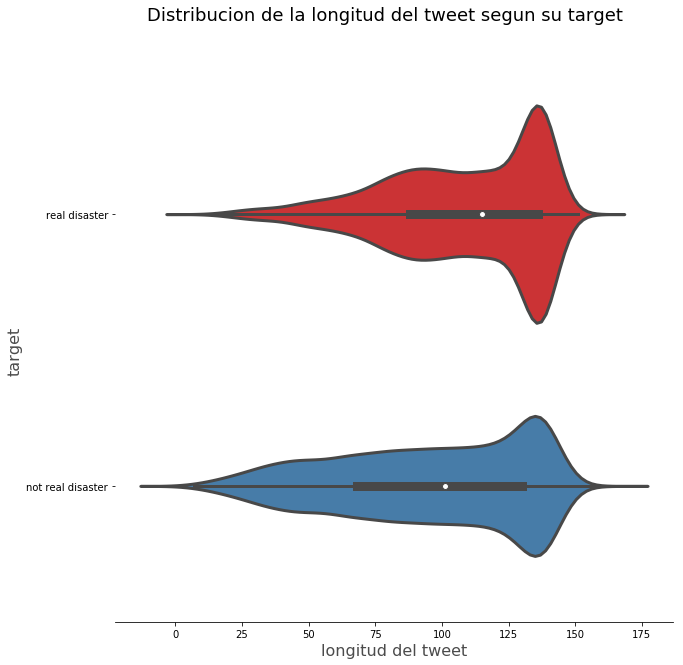

In [32]:
f, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="long",y="target_description",data=dfTweets, inner="box"
               , palette="Set1", cut=3, linewidth=3, orient="h")
sns.despine(left=True)

f.suptitle('Distribucion de la longitud del tweet segun su target', fontsize=18)
ax.set_xlabel("longitud del tweet",size = 16,alpha=0.7)
ax.set_ylabel("target",size = 16,alpha=0.7)

Text(0.5, 0, 'target')

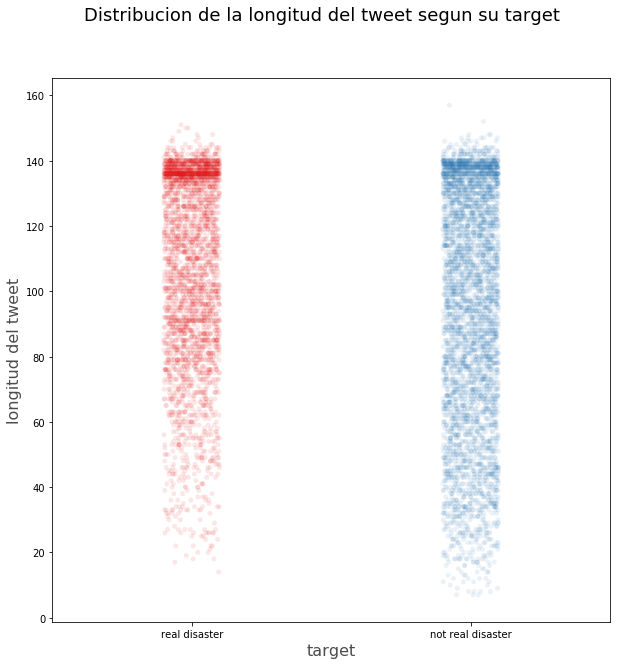

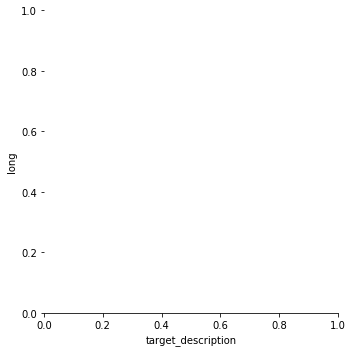

In [151]:
f, ax = plt.subplots(figsize=(10, 10))
sns.catplot(x="target_description",y="long",data=dfTweets, palette="Set1",alpha=0.1,  ax=ax)
sns.despine(left=True)

f.suptitle('Distribucion de la longitud del tweet segun su target', fontsize=18)
ax.set_ylabel("longitud del tweet",size = 16,alpha=0.7)
ax.set_xlabel("target",size = 16,alpha=0.7)


In [33]:
dfTweets['total'] = 1

In [43]:
dfTweet_target = dfTweets.groupby('target_description').count()['total'].sort_values(ascending=False).to_frame()
dfTweet_target

,total
target_description,
not real disaster,4342
real disaster,3271


(-22.676862709764592, 186.6768627097646, 1.5, -0.5)

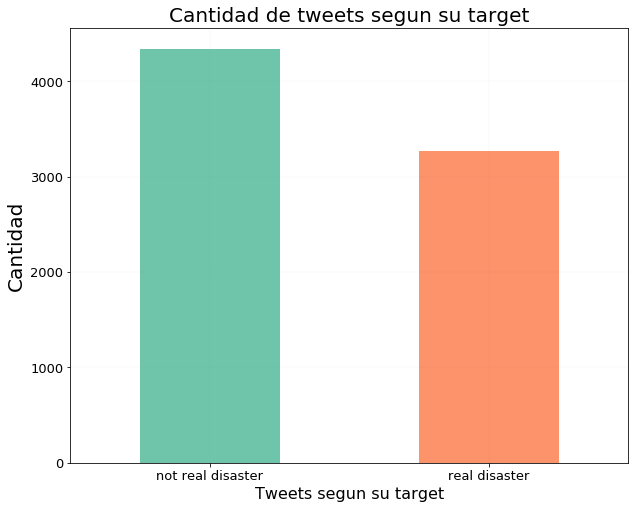

In [111]:
paired_colors = plt.cm.Set2(range(len(dfTweet_target)))
#plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True);

dfTweet_target['total'].plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, alpha = 0.95 ,fontsize=13  );
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.2);

plt.title('Cantidad de tweets segun su target', fontsize=20);
plt.xlabel('Tweets segun su target', fontsize=16);
plt.ylabel('Cantidad', fontsize=20);


In [107]:
dfTweet_longitud = dfTweet_longitud.reset_index()


In [74]:
dfTweet_longitud = dfTweets.groupby('long').count()['total']

In [79]:
dfTweet_longitud = dfTweet_longitud.to_frame()

In [87]:
dfTweet_longitud

,total
long,
7,3
8,4
9,2
10,2
11,4
...,...
149,1
150,2
151,1


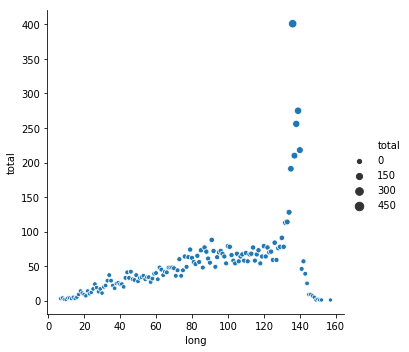

In [157]:
#plt.figure(figsize=(20,15))
# the size of A4 paper
sns.relplot(x="long", y="total", data=dfTweet_longitud, size='total')
sns.despine()
